In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Homework 4

**student id: U202115980 杨筠松**

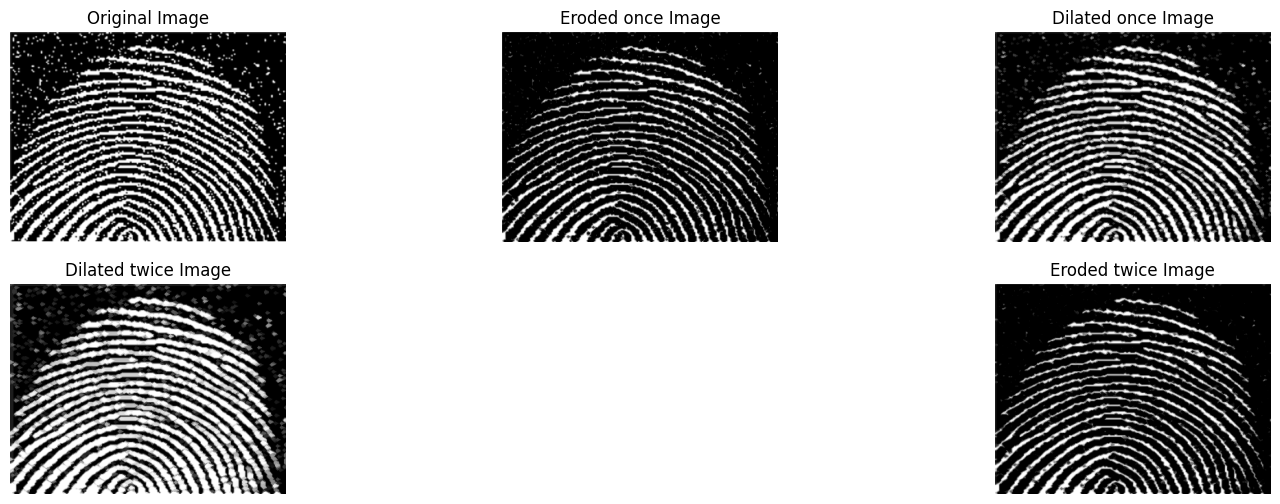

In [2]:

image_path = "./data/image1.png" 
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 3))

eroded_once = cv2.erode(img, kernel, iterations=1)
dilated_once = cv2.dilate(eroded_once, kernel, iterations=1)
dilated_twice = cv2.dilate(dilated_once, kernel, iterations=1)
eroded_twice = cv2.erode(dilated_once, kernel, iterations=1)


fig, axs = plt.subplots(2, 3, figsize=(18, 6))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(eroded_once, cmap='gray')
axs[0, 1].set_title('Eroded once Image')
axs[0, 1].axis('off')

axs[0, 2].imshow(dilated_once, cmap='gray')
axs[0, 2].set_title('Dilated once Image')
axs[0, 2].axis('off')

axs[1, 0].imshow(dilated_twice, cmap='gray')
axs[1, 0].set_title('Dilated twice Image')
axs[1, 0].axis('off')

axs[1, 1].set_visible(False)

axs[1, 2].imshow(eroded_twice, cmap='gray')
axs[1, 2].set_title('Eroded twice Image')
axs[1, 2].axis('off')

plt.show()


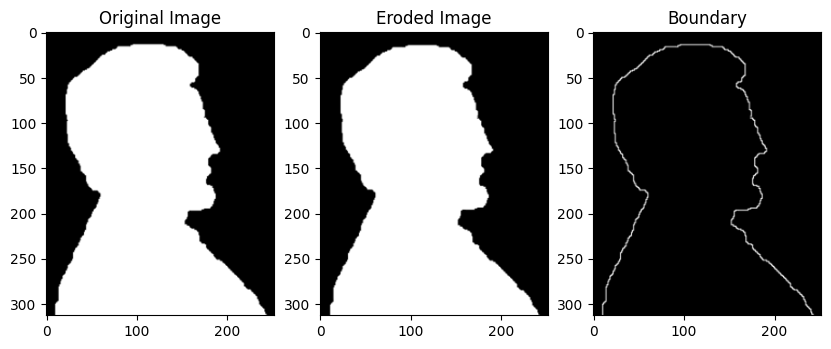

In [3]:
image_path = "data/image2.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Image not found!")

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

eroded_img = cv2.erode(img, kernel, iterations=1)

boundary = cv2.subtract(img, eroded_img)

plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(eroded_img, cmap='gray'), plt.title('Eroded Image')
plt.subplot(133), plt.imshow(boundary, cmap='gray'), plt.title('Boundary')
plt.show()

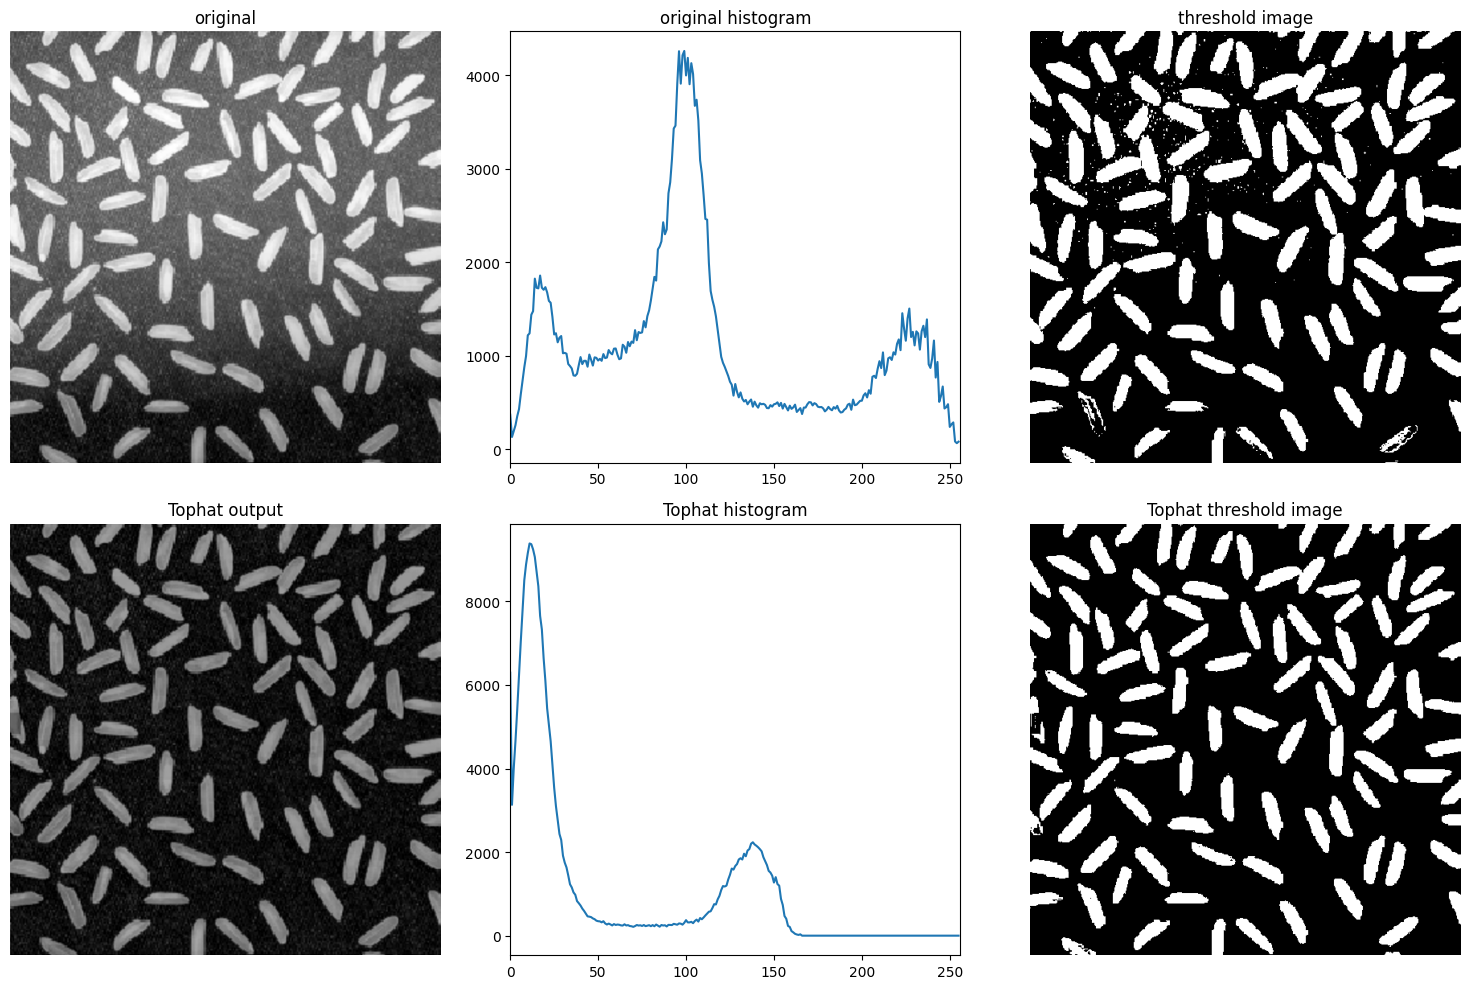

In [4]:
image_path = "data/image3.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))

tophat_image = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

histogram_original = cv2.calcHist([image], [0], None, [256], [0, 256])
histogram_tophat = cv2.calcHist([tophat_image], [0], None, [256], [0, 256])

_, thresholded_original = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
_, thresholded_tophat = cv2.threshold(tophat_image, 100, 255, cv2.THRESH_BINARY)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  

axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
axs[0, 0].set_title('original')
axs[0, 0].axis('off')

axs[0, 1].plot(histogram_original)
axs[0, 1].set_title('original histogram')
axs[0, 1].set_xlim([0, 256])

axs[0, 2].imshow(cv2.cvtColor(thresholded_original, cv2.COLOR_GRAY2RGB))
axs[0, 2].set_title('threshold image')
axs[0, 2].axis('off')

axs[1, 0].imshow(cv2.cvtColor(tophat_image, cv2.COLOR_GRAY2RGB))
axs[1, 0].set_title('Tophat output')
axs[1, 0].axis('off')

axs[1, 1].plot(histogram_tophat)
axs[1, 1].set_title('Tophat histogram')
axs[1, 1].set_xlim([0, 256])

axs[1, 2].imshow(cv2.cvtColor(thresholded_tophat, cv2.COLOR_GRAY2RGB))
axs[1, 2].set_title('Tophat threshold image')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

68 12 340 70
214 178 265 178
68 9 338 64
26 206 251 262
99 174 179 174
94 219 295 267
226 121 283 92
218 130 219 130
88 194 128 175
258 151 322 151
41 209 46 207
104 42 157 95
258 146 320 146
238 117 293 90
291 235 301 245


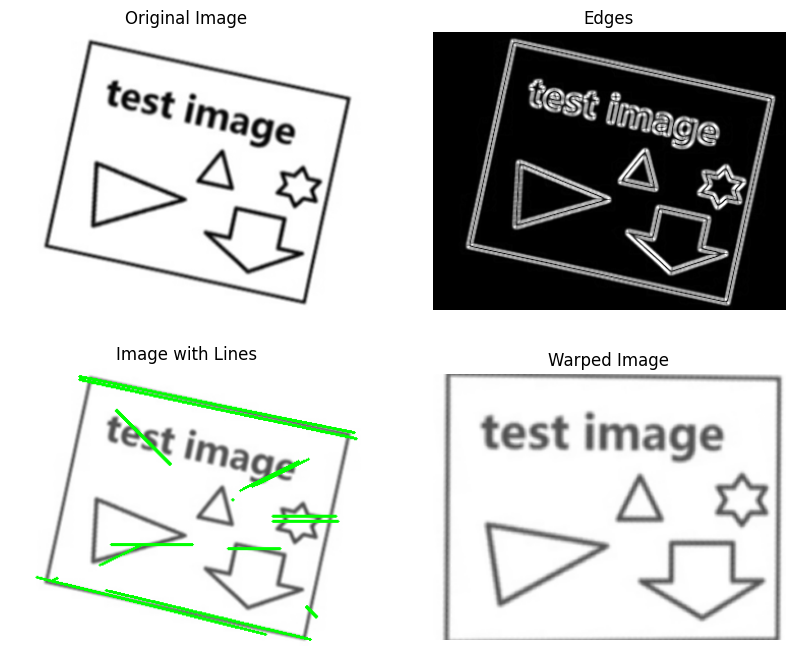

In [5]:
image_path = "data/image4.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

grad_x = cv2.Sobel(image, cv2.CV_16S, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_16S, 0, 1, ksize=3)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
edges = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

lines = cv2.HoughLinesP(edges, 4, np.pi / 360, 1000)
image_with_lines = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR) 
points = []

for line in lines:
    x1, y1, x2, y2 = line[0]
    points.append((x1, y1))
    points.append((x2, y2))
    cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)
    print(x1, y1, x2, y2)

center_x = sum(x for x, y in points) / len(points)
center_y = sum(y for x, y in points) / len(points)

top_left = None
bottom_left = None
top_right = None
bottom_right = None

max_dist_tl = -1
max_dist_bl = -1
max_dist_tr = -1
max_dist_br = -1

for x, y in points:
    dist = abs(center_x - x) + abs(center_y - y)
    
    if x < center_x and y < center_y:
        if dist > max_dist_tl:
            max_dist_tl = dist
            top_left = (x, y)
    elif x < center_x and y > center_y: 
        if dist > max_dist_bl:
            max_dist_bl = dist
            bottom_left = (x, y)
    elif x > center_x and y < center_y:  
        if dist > max_dist_tr:
            max_dist_tr = dist
            top_right = (x, y)
    elif x > center_x and y > center_y:  
        if dist > max_dist_br:
            max_dist_br = dist
            bottom_right = (x, y)

pts_src = np.array([top_left, top_right, bottom_right, bottom_left], dtype=np.float32)

width = int(np.linalg.norm(pts_src[1] - pts_src[0]))
height = int(np.linalg.norm(pts_src[2] - pts_src[1]))

pts_dst = np.array([
    [0, 0],
    [width - 1, 0],
    [width - 1, height - 1],
    [0, height - 1]
], dtype=np.float32)

M = cv2.getPerspectiveTransform(pts_src, pts_dst)

warped_image = cv2.warpPerspective(image, M, (width, height))

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image_with_lines)
plt.title('Image with Lines')
plt.axis('off')

warped_image_rgb = cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB)

plt.subplot(2, 2, 4)
plt.imshow(warped_image_rgb)
plt.title('Warped Image')
plt.axis('off')

plt.show()